# Comparing Urban and Rural Streams
In this notebook we'll compare the hydrology of two streams in the Baltimore area:
* [Grave Run](https://waterdata.usgs.gov/md/nwis/uv?site_no=01581830), a rural stream with only 0.3% impervious surfaces, and
* [Dead Run](https://waterdata.usgs.gov/md/nwis/uv?site_no=01589330), an urban stream that is 39% impervious surfaces.

These two watersheds are similar in size, topography, and geology. They also have very emo names.

In [ ]:
# For future notice if hydrofunctions is not available on HydroShare:
# Use these commands to install a pip package in the current Jupyter kernel (should be Python 3)
#import sys
#!{sys.executable} -m pip install hydrofunctions

In [1]:
# Start with the usual.
import numpy as np
import pandas as pd
import hydrofunctions as hf
print(hf.__version__)
import matplotlib as plt
%matplotlib inline

0.1.7


In [2]:
# request data for our two sites for a three-year period.
sites = ['01581830', '01589330']
request = hf.NWIS(sites, start_date='2002-01-01', end_date='2005-01-01').get_data()
request.ok # Verify that the data request went fine.

True

In [3]:
# We'll store our data in a dataframe named 'Q'
Q = request.df()
Q.head()  # Print the first five rows to verify.

USGS:01581830:00060:00003 USGS:01581830:00060:00003_qualifiers  \
2002-01-01                       3.20                                  A e   
2002-01-02                       3.20                                  A e   
2002-01-03                       3.30                                  A e   
2002-01-04                       3.20                                  A e   
2002-01-05                       4.18                                    A   

            USGS:01589330:00060:00003 USGS:01589330:00060:00003_qualifiers  
2002-01-01                       0.60                                    A  
2002-01-02                       0.61                                    A  
2002-01-03                       0.60                                    A  
2002-01-04                       0.64                                    A  
2002-01-05                       0.60                                    A

In [4]:
# What are the names for our two sites?
request.siteName

['GRAVE RUN NEAR BECKLEYSVILLE, MD', 'DEAD RUN AT FRANKLINTOWN, MD']

In [5]:
# Modify our dataframe so that it only includes the columns with discharge in them.
Q = Q.iloc[:,[0,2]]
# What are the column names?
Q.columns

Index(['USGS:01581830:00060:00003', 'USGS:01589330:00060:00003'], dtype='object')

In [6]:
# Rename the columns to 'Urban' and 'Rural' so we remember which is which!
Q.rename(index=str, columns={"USGS:01581830:00060:00003": "Rural", "USGS:01589330:00060:00003": "Urban"}, inplace=True)
Q.head()  # List the first five rows.

Rural  Urban
2002-01-01 00:00:00   3.20   0.60
2002-01-02 00:00:00   3.20   0.61
2002-01-03 00:00:00   3.30   0.60
2002-01-04 00:00:00   3.20   0.64
2002-01-05 00:00:00   4.18   0.60

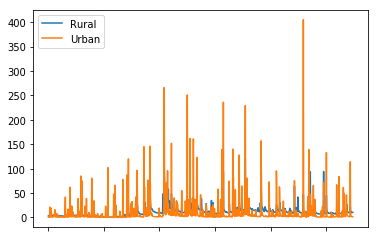

In [7]:
# Let's plot our data to create a hydrograph. plot() is a method that is built-in to dataframes.
Q.plot()

(<matplotlib.figure.Figure at 0x7f2e74aabf60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e74aecbe0>)

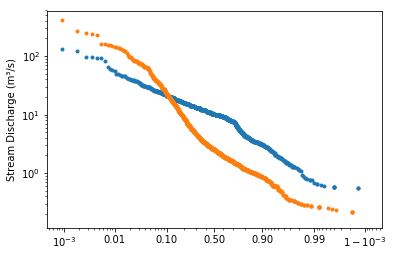

In [8]:
# Let's create a flow duration chart for our two sites!
# .flow_duration is a function included in Hydrofunctions. It accepts dataframes as input.
hf.flow_duration(Q)

In [9]:
!ls

data		    Import_USGS_to_Pandas.ipynb  Urban_Rural_Streams.ipynb
help		    notebooks			 utilities
hydrofunctions-old  test			 Welcome.ipynb


In [12]:
# lets save this content as a new resource in HydroShare
abstract = 'This notebook demonstrates how to use the Python package "hydrofunctions" to download stream discharge data from the NWIS and plot a stream hydrograph and a flow duration chart.'
title = 'Comparing Urban and Rural Streams'    
keywords = ['Python', 'flow duration', 'hydrofunctions', 'hydrology']  
rtype = 'genericresource'
files = 'Urban_Rural_Streams.ipynb'

# create the new resource
from utilities import hydroshare
hs = hydroshare.hydroshare()
resource_id = hs.createHydroShareResource(abstract, 
                                          title, 
                                          keywords=keywords, 
                                          resource_type=rtype, 
                                          content_files=files, 
                                          public=True)


Environment file could not be found.  Make sure that the JUPYTER_ENV variable is set properly

The hs_utils library requires a secure connection to your HydroShare account.
Please enter your HydroShare username: mroberge@towson.edu
Enter the HydroShare password for user 'mroberge@towson.edu': ········
Successfully established a connection with HydroShare
Resource Created Successfully                           


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jovyan/work/notebooks/utilities/hydroshare/threads.py", line 23, in f
    res = self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/hs_restclient/__init__.py", line 738, in createResource
    close_fd = self._prepareFileForUpload(params, resource_file, resource_filename)
  File "/opt/conda/lib/python3.6/site-packages/hs_restclient/__init__.py", line 170, in _prepareFileForUpload
    raise HydroShareArgumentException("{0} is not a file or is not readable.".format(resource_file))
hs_restclient.exceptions.HydroShareArgumentException: U is not a file or is not readable.

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/threading.py", line 916

Successfully Added Content Files                      
